In [20]:
from instruments_recognition.importing_data import *
from instruments_recognition.plotting import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
### IMPORTING SYNTHETIC SINUSOIDS calls

        
algunos = [gimme_sinusoids_noise(500,[.8,.4,.8,.8,.6,.5,.1,.1]),
          gimme_sinusoids(400,[.5,.3,.4,.5,.6,.7,.1,.1])]
namos = ['500','400']

# more global variables
ex_transformed, freq_label = list(zip(*map(transform_floats, algunos)))
names_and_graphs = list(zip(namos, ex_transformed, freq_label))



#plt.plot(ex_transformed[0])
#plt.show()


In [16]:
### IMPORTING DATA calls


# global variables
# directory with data
#datadirectory = "./samples/sonatina_symphonic_orchestra/Samples/Flute/"
datadirectory = "./samples/flute/philharmonia/"

# maximum of examples
max_ex = 5

# channels
# TODO: do not hardcode this!
channels = 1

# file names
ex_wav = glob.glob(datadirectory + '*.wav')[:max_ex]

# TODO: a human-readble version of ex_wav
# ex_names = 


# more global variables
ex_transformed, freq_label = list(zip(*map(lambda e : import_convert_transform(e,channels), ex_wav)))
names_and_graphs = list(zip(ex_wav, ex_transformed, freq_label))

In [17]:
### FINDING HARMONICS calls

#harmonic_volumes_every_example = [ harmonics_frequency_volumes(ex_tr, freq_lbl) for ex_name , ex_tr, freq_lbl in names_and_graphs ]
#harmonic_number_volumes_every_example = [ cast_harmonics(f,v) for f,v in harmonic_volumes_every_example ]
harmonic_number_volumes_every_example = [ harmonics_energy(ex_tr, freq_lbl) for ex_name , ex_tr, freq_lbl in names_and_graphs ]


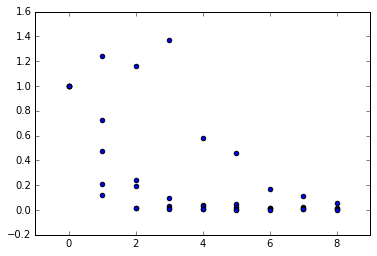

In [18]:
### PLOTTING calls

# get data
#names_and_graphs_and_harm = zip(names_and_graphs, harmonic_volumes_every_example)
names_and_graphs_and_harm_number = list(zip(names_and_graphs, harmonic_number_volumes_every_example))

# plot

minfreq_plot = 60
maxfreq_plot = 4000

plotharmonics_nc(names_and_graphs_and_harm_number)
#plotharmonics(names_and_graphs_and_harm_number)
#plotharmonics2(names_and_graphs_and_harm_number)
#plotspec_and_harmonics(names_and_graphs_and_harm_number)

#plt.legend(loc='upper right')
#plt.yscale('log')
#plt.xlim([minfreq_plot,maxfreq_plot])
plt.show()

#plt.plot([0,1,2])
#plt.show()

In [19]:
### LEARN functions

datadirectory1 = "./samples/flute/philharmonia/"
datadirectory2 = "./samples/oboe/philharmonia/"

howmanyexamples = 700

channels = 1

ex_wav1 = glob.glob(datadirectory1 + '*.wav')[:howmanyexamples]
ex_wav2 = glob.glob(datadirectory2 + '*.wav')[:howmanyexamples]

#ex_transformed1, freq_label1 = zip(*map(import_convert_transform, ex_wav1))
#ex_transformed2, freq_label2 = zip(*map(import_convert_transform, ex_wav2))

# zip(ex_transformed1, freq_label1)
# zip(ex_transformed2, freq_label2)

trandlbl1ar, vd1 = list(zip(*map(lambda e: import_convert_transform2(e,channels), ex_wav1)))
trandlbl2ar, vd2 = list(zip(*map(lambda e: import_convert_transform2(e,channels), ex_wav2)))

trandlbl1a, trandlbl1r = list(zip(*trandlbl1ar))
trandlbl2a, trandlbl2r = list(zip(*trandlbl2ar))


### LEARN 2

#print(trandlbl1a[0])



energylbl1a_withmore = [ harmonics_energy(ex_tr, freq_lbl) for ex_tr, freq_lbl in trandlbl1a ]
energylbl2a_withmore = [ harmonics_energy(ex_tr, freq_lbl) for ex_tr, freq_lbl in trandlbl2a ]

energylbl1r_withmore = [ harmonics_energy(ex_tr, freq_lbl) for ex_tr, freq_lbl in trandlbl1r ]
energylbl2r_withmore = [ harmonics_energy(ex_tr, freq_lbl) for ex_tr, freq_lbl in trandlbl2r ]


#### make a copy since we will shuffle the inputs and the shuffling works in place!
#energylbl1a_withmore = copy.deepcopy(energylbl1a_withmore_)
#energylbl2a_withmore = copy.deepcopy(energylbl2a_withmore_)
#energylbl1r_withmore = copy.deepcopy(energylbl1r_withmore_)
#energylbl2r_withmore = copy.deepcopy(energylbl2r_withmore_)


KeyboardInterrupt: 

In [28]:
### LEARN 3


howmanyharmonics = 7

# forget the frequencies
# and forget the first volume which is always 1
def only_volumes(energylbl) :
    return list(map(lambda l : l[1][1:howmanyharmonics+1], energylbl))

# take only non nan from a list
def cleannan(l):
    return [x for x in l if not isnan(x)]

# input: list of lists
# output: only lists that do not contain any nans
def cleannan2(l):
    return [x for x in l if np.isfinite(x).all()]


energylbl1a = only_volumes(energylbl1a_withmore)
energylbl1r = only_volumes(energylbl1r_withmore)
energylbl2a = only_volumes(energylbl2a_withmore)
energylbl2r = only_volumes(energylbl2r_withmore)


# we can put l1 and l2, or just l2.
#energylbl1 = [ (l1 + l2) for l1, l2, v in zip(energylbl1a,energylbl1r,vd1)]
#energylbl2 = [ (l1 + l2) for l1, l2, v in zip(energylbl2a,energylbl2r,vd2)]
# it seems to work better with just l2
energylbl1 = energylbl1r
energylbl2 = energylbl2r


volumes1 = cleannan2(energylbl1)
volumes2 = cleannan2(energylbl2)
#shuffle the inputs (this is in place )
random.seed(0)
random.shuffle(volumes1)
random.shuffle(volumes2)


#nthvolume = [ map(lambda l : l[n], only_volumes) for n in range(0,num_harmonics) ]
#
#nthvolumecleaned = map(cleannan, nthvolume)
#
#averages = map(average, nthvolumecleaned)
#
#minusaverages = [ map(lambda m : m-averages[n], nthvolumecleaned[n]) for n in range(0,num_harmonics) ]
#
#variances = map(rms, minusaverages)
#
#variances, averages

#print(vd1[2])

In [30]:
### LEARN 4

from sklearn import neighbors, svm

#fractiontrain = 9./10.
fractiontrain = 5./6.
#fractiontrain = 4./5.
#fractiontrain = 1./100.

#training examples
trainvolumes1 = volumes1[:int(len(volumes1)*fractiontrain)]
trainvolumes2 = volumes2[:int(len(volumes2)*fractiontrain)]

howmanytrain1 = len(trainvolumes1)
howmanytrain2 = len(trainvolumes2)
howmanytrain = howmanytrain1 + howmanytrain2

#testing examples
testvolumes1 = volumes1[int(len(volumes1)*fractiontrain):len(volumes1)]
testvolumes2 = volumes2[int(len(volumes2)*fractiontrain):len(volumes2)]

howmanytest1 = len(testvolumes1)
howmanytest2 = len(testvolumes2)


training_ex = trainvolumes1 + trainvolumes2
labels = [ 1 for i in range(0,howmanytrain1) ] + [ 0 for i in range(0,howmanytrain2) ]


#########################

## assert: there are no testing samples in the training set

def is_in(e,l):
    res = False
    for v in l:
        if all([f1 == f2 for f1, f2 in zip(e,v)]) :
            res = True
    return res
            
#testing: is_in([1.],[[0.],[0.,4,3],[1.]])
    
alltests = testvolumes1 + testvolumes2

datasnooping = any([ is_in(test, training_ex) for test in alltests ])
if datasnooping :
    print("WARNING: you are testing on the training set")
print("doing data snooping? " + str(datasnooping))

doing data snooping? False


In [31]:
### Learning algorithm

## SVN does not seem to work
#clf = svm.SVC(kernel='linear')
#clf.fit(training_ex, labels) 


# nearest neighboor
n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(training_ex, labels) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
### CALCULATING ERROR

print("training with: " + str(howmanytrain))
print("testing with: " + str(howmanytest1 + howmanytest2))

goods1 = list(clf.predict(testvolumes1))
goods2 = [ 1-x for x in clf.predict(testvolumes2) ]

error = 1. - np.average(goods1+goods2)

print("error: " + str(error))


training with: 1021
testing with: 206
error: 0.208737864078


In [608]:

def only_volumes1(energylbl) :
    return list(map(lambda l : l[1][1:], energylbl))

#only_volumes(energylbl1)

In [370]:
set([1,2]).intersection(set([1]))

{1}

In [467]:
a = [1,2,3,4,5,6]
np.random.seed(3)
np.random.shuffle(a)
a

[4, 6, 5, 2, 1, 3]

In [9]:
a = [1,2]
b = copy.copy(a)